Analysis

1: Capomulin and Ramicane have been shown to have a decreased tumor size of more than 25% compared to all other regimens tested 
within this study.
2: Capomulin and Ramicane also have greater data collection totals over time than all other drug regimins.
3: When subjects final timepoint measurements were compared, Capomulin and Ramicane are seen to be far superior than Infubinol 
and Ceftamin. The latter two drug regimens are fairly comparable to the other six regimens tested within this study.
4: Mouse l509 displayed a considerable drop of 20% in tumor size from day 20 to roughly day 35 during this study,
Capomulin was the particular regimen applied to this mouse.
5: Mouse total mass and the respective tumor size presented a strong correlation within the Capomulin Regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_overall = pd.merge(mouse_metadata, study_results, how="outer", on= "Mouse ID")

# Display the data table for preview

data_overall.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
counts = data_overall["Mouse ID"].nunique()

counts

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_overall["Mouse ID"].value_counts()

g989    13
j365    10
b879    10
k210    10
c757    10
        ..
t573     1
b447     1
h428     1
l872     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse id
index_df = data_overall.set_index("Mouse ID")
index_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(["g989"])

clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_df.reset_index()

clean_df["Mouse ID"].nunique()

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = clean_df.groupby("Drug Regimen")

tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_variance = summary_df["Tumor Volume (mm3)"].var()
tumor_std_dev = summary_df["Tumor Volume (mm3)"].std()
tumor_SEM = summary_df["Tumor Volume (mm3)"].sem()

grouped_summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                  "Median Tumor Volume": tumor_median,
                                  "Tumor Volume Variance": tumor_variance,
                                  "Tumor Volume Std. Dev.": tumor_std_dev,
                                  "Tumor Volume Std. Err.": tumor_SEM})

grouped_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df.aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Mice Tested')

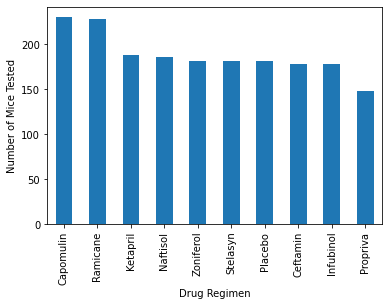

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df["Drug Regimen"].value_counts().plot.bar(width=0.5, zorder=3)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

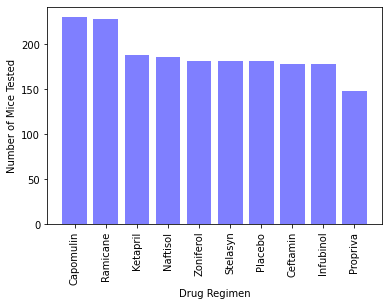

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count = clean_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(count))

plt.bar(x_axis, count, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count.index.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

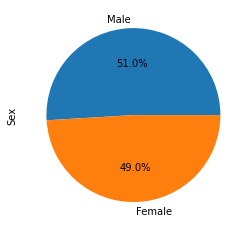

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = clean_df["Sex"].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=0)


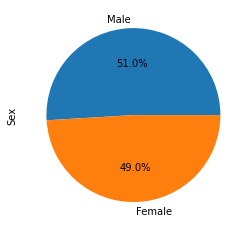

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data1 = clean_df["Sex"].value_counts()

plt.pie(data1, labels=data.index.values, startangle=0, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time_df = pd.merge(clean_df, max_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")
last_time_df                                

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_time_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        tumor_cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row["Tumor Volume (mm3)"])
    
    # add subset 
dr_df = pd.DataFrame({treatments[0]: tumor_cap,
                         treatments[1]: tumor_ram,
                         treatments[2]: tumor_inf,
                         treatments[3]: tumor_cef})
    
dr_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [59]:
#Quantile calculations for Drug Regimens of interest
quart_cap = dr_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
upb_cap = up_cap + (1.5*iqr_cap)
lowb_cap = low_cap - (1.5*iqr_cap)


quart_ram = dr_df[treatments[1]].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
upb_ram = up_ram + (1.5*iqr_ram)
lowb_ram = low_ram - (1.5*iqr_ram)


quart_inf = dr_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
upb_inf = up_inf + (1.5*iqr_inf)
lowb_inf = low_inf - (1.5*iqr_inf)
outliers = dr_df.loc[(dr_df[treatments[2]] <= lowb_inf) | (dr_df[treatments[2]] >= upb_inf)]["Infubinol"]
print("The following are the outliers in the boxplot:{}".format(outliers))


quart_cef = dr_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
upb_cef = up_cef + (1.5*iqr_cef)
lowb_cef = low_cef - (1.5*iqr_cef)


#Outlier determination

outliers = pd.DataFrame({"Drug": treatments,
                        "Lower Quartile": [low_cap, low_ram, low_inf, low_cef],
                        "Median": [med_cap, med_ram, med_inf, med_cef],
                        "Upper Quartile": [up_cap, up_ram, up_inf, up_cef],
                        "IQR": [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                        "Upper Bound": [upb_cap, upb_ram, upb_inf, upb_cef],
                        "Lower Bound": [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        })

outliers
outliers_group = outliers.groupby("Drug")
outliers_group.head()

The following are the outliers in the boxplot:5    36.321346
Name: Infubinol, dtype: float64


,Drug,Lower Quartile,Median,Upper Quartile,IQR,Upper Bound,Lower Bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,51.832015,20.704562
1,Ramicane,31.560470,36.561652,40.659006,9.098537,54.306811,17.912664
2,Infubinol,54.048608,60.165180,65.525743,11.477135,82.741446,36.832905
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,87.666458,25.355450


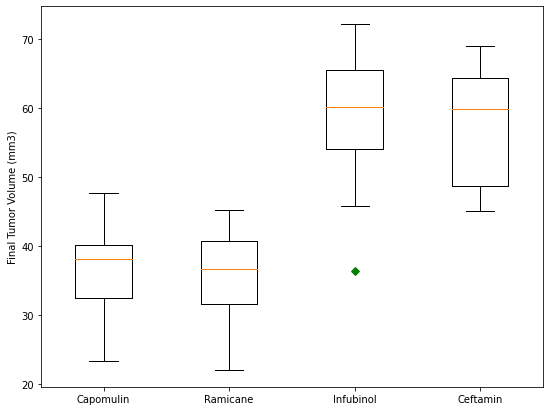

In [54]:
boxplot_list = [dr_df[treatments[0]],
               dr_df[treatments[1]],
               dr_df[treatments[2]],
               dr_df[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel("Final Tumor Volume (mm3)")

ax.boxplot(boxplot_list, 0, "gD")
plt.xticks([1,2,3,4], treatments)
plt.savefig("boxplot")
plt.show()

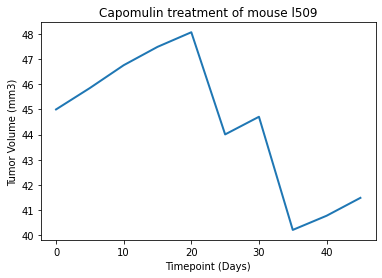

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_plot

x_axis = line_plot["Timepoint"]

y_axis = line_plot["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

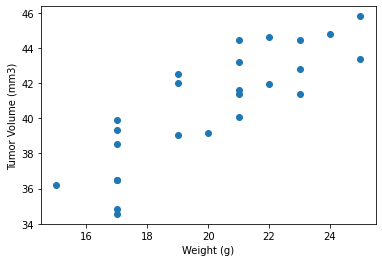

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_plot = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

avg = scat_plot.groupby(["Mouse ID"]).mean()

plt.scatter(avg["Weight (g)"],avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(avg["Weight (g)"],avg["Tumor Volume (mm3)"])[0],2)
correlation

0.84

In [30]:
regression=st.linregress(avg["Weight (g)"],avg["Tumor Volume (mm3)"])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [31]:
slope = 0.9544396890241045
intercept = 21.552160532685015

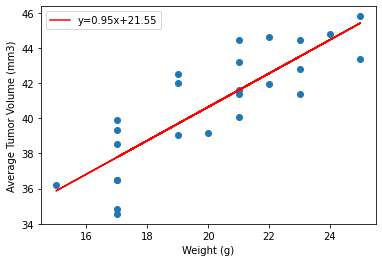

In [32]:
regress_lin = slope*(avg["Weight (g)"]) + intercept

plt.scatter(avg["Weight (g)"],avg["Tumor Volume (mm3)"])

plt.plot(avg["Weight (g)"], regress_lin, "r", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.legend()

plt.show()